# Trabajo Practico 1

In [1]:
# encoding=utf8

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carga de datos, indicando el tipo de dato se redujo de 71.3 Mb a 11.2 Mb

data = pd.read_csv('data/clean_Data.csv',dtype = {
    "building_id" : "int32",
    "geo_level_1_id" : "int8", 
    "geo_level_2_id" : "int16",
    "geo_level_3_id" : "int16",
    "count_floors_pre_eq" : "int8",
    "age" : "int16",
    "area_percentage" :"int8",
    "height_percentage" :"int8",
    "land_surface_condition" :"category",
    "foundation_type" :"category",
    "roof_type" :"category",
    "ground_floor_type" :"category",
    "other_floor_type" :"category",
    "position" :"category",
    "plan_configuration" :"category",
    "has_superstructure_adobe_mud" : "bool",
    "has_superstructure_mud_mortar_stone" : "bool",
    "has_superstructure_stone_flag" : "bool",
    "has_superstructure_cement_mortar_stone" : "bool",
    "has_superstructure_mud_mortar_brick" : "bool",
    "has_superstructure_cement_mortar_brick" : "bool",
    "has_superstructure_timber" : "bool",
    "has_superstructure_bamboo" : "bool",
    "has_superstructure_rc_non_engineered" : "bool",
    "has_superstructure_rc_engineered" : "bool",
    "has_superstructure_other" : "bool",
    "legal_ownership_status" :"category",
    "count_families" : "int8",
    "has_secondary_use" : "bool",
    "has_secondary_use_agriculture" : "bool",
    "has_secondary_use_hotel" : "bool",
    "has_secondary_use_rental" : "bool",
    "has_secondary_use_institution" : "bool",
    "has_secondary_use_school" : "bool",
    "has_secondary_use_industry" : "bool",
    "has_secondary_use_health_post" : "bool",
    "has_secondary_use_gov_office" : "bool",
    "has_secondary_use_use_police" : "bool",
    "has_secondary_use_other" : "bool",
    "damage_grade" : "category" 
                    
})


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   geo_level_1_id                          260601 non-null  int8    
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int8    
 7   height_percentage                       260601 non-null  int8    
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [4]:
data.describe(include="all")

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,"260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00",260601,260601,...,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601
unique,nan,nan,nan,nan,nan,nan,nan,nan,3,5,...,2,2,2,2,2,2,2,2,2,3
top,nan,nan,nan,nan,nan,nan,nan,nan,t,r,...,False,False,False,False,False,False,False,False,False,2
freq,nan,nan,nan,nan,nan,nan,nan,nan,216757,219196,...,251838,258490,260356,260507,260322,260552,260563,260578,259267,148259
mean,"525,675.48",13.90,701.07,"6,257.88",2.13,26.54,8.02,5.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"304,545.00",8.03,412.71,"3,646.37",0.73,73.57,4.39,1.92,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.00,0.00,0.00,0.00,1.00,0.00,1.00,2.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"261,190.00",7.00,350.00,"3,073.00",2.00,10.00,5.00,4.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"525,757.00",12.00,702.00,"6,270.00",2.00,15.00,7.00,5.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"789,762.00",21.00,"1,050.00","9,412.00",2.00,30.00,9.00,6.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculo porcentaje de tipo de daño de los edifcios

In [5]:
cantidad_edificios = data["building_id"].count()
cantidad_edificios

260601

In [6]:
damage = data.groupby(["damage_grade"]).count()
damage

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
damage_grade,,,,,,,,,,,,,,,,,,,,,
1,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,...,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124
2,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,...,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259
3,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,...,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218


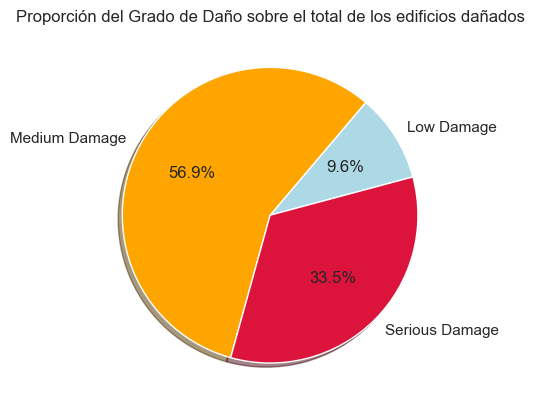

In [7]:
#Definir colores
my_colors = my_colors = ['lightblue','orange','crimson']

plt.pie(damage["building_id"].to_list(),
        labels = ["Low Damage" ,"Medium Damage","Serious Damage"],
        autopct='%1.1f%%',
        startangle=15,           
        shadow = True,
        colors = my_colors
)
plt.title("Proporción del Grado de Daño sobre el total de los edificios dañados")
plt.savefig("proporcion_grado_daño.jpg")
plt.show()

## Mis columnas a estudiar

In [8]:
# Me quedo solo con los datos que me toca analizar
data_values_short = data.loc[:,["building_id",
                                "geo_level_1_id",
                                "geo_level_2_id",
                                "geo_level_3_id",
                                "count_floors_pre_eq",
                                "age",
                                "area_percentage",
                                "height_percentage",
                                "damage_grade"
                                ]]
data_values_short["cantidad"] = 1
data_values_short

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,damage_grade,cantidad
0,802906,6,487,12198,2,30,6,5,3,1
1,28830,8,900,2812,2,10,8,7,2,1
2,94947,21,363,8973,2,10,5,5,3,1
3,590882,22,418,10694,2,10,6,5,2,1
4,201944,11,131,1488,3,30,8,9,3,1
...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,2,1
260597,669485,17,715,2060,2,0,6,5,3,1
260598,602512,17,51,8163,3,55,6,7,3,1
260599,151409,26,39,1851,2,10,14,6,2,1


## Por Edades

In [9]:
data_values_short["age"].describe()

count             260,601.00
mean                   26.54
std                    73.57
min                     0.00
25%                    10.00
50%                    15.00
75%                    30.00
max                   995.00
Name: age, dtype: float64

In [10]:
# Analizo las 10 regiones con mayor cantidad de edificios dañados
top10MasDañadasEdad = dict(data_values_short["age"].value_counts().nlargest(20))
edad_mas_dañadas = sorted(list(top10MasDañadasEdad.keys()))


<AxesSubplot:title={'center':'Histograma Antiguedad de la consturcciones'}, ylabel='Frequency'>

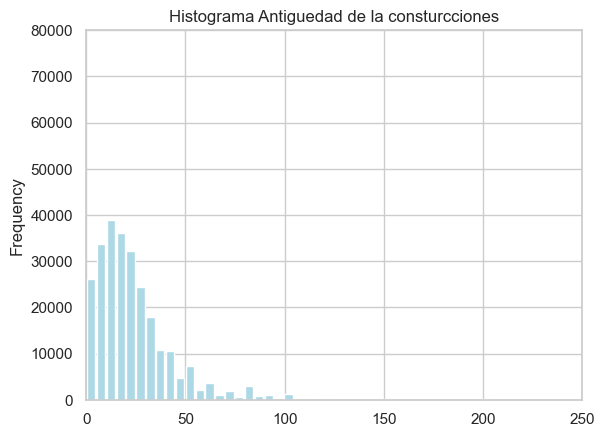

In [11]:
data_values_short["age"].plot(kind = "hist",bins = 200,color='lightblue',\
      rwidth=0.85,ylim=(0,80000),xlim=(0,250),\
      title="Histograma Antiguedad de la consturcciones")

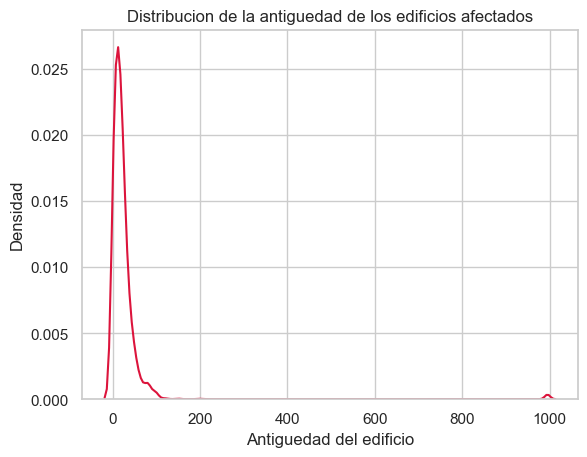

In [66]:
g = sns.distplot(data_values_short["age"],color="crimson",hist = False,label= "crimson")
g.set_ylabel("Densidad")
g.set_xlabel("Antiguedad del edificio")
g.set_title("Distribucion de la antiguedad de los edificios afectados")
plt.savefig("densidad antiguedad.jpg", bbox_inches='tight')

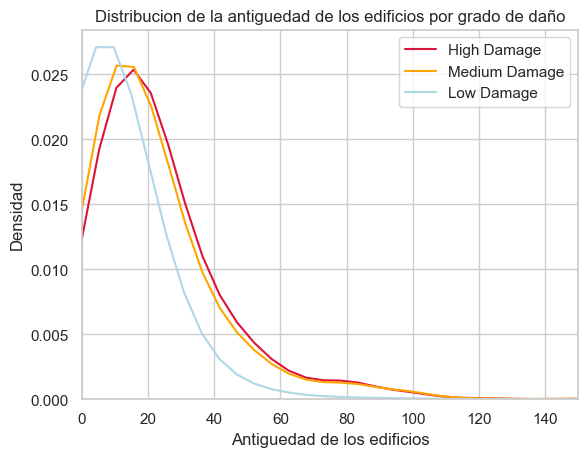

In [65]:
g = sns.distplot(data_values_short[data_values_short["damage_grade"] == "3"]["age"],color="crimson",hist = False,label= "High Damage")
g = sns.distplot(data_values_short[data_values_short["damage_grade"] == "2"]["age"],color="orange",hist = False,label= "Medium Damage")
g = sns.distplot(data_values_short[data_values_short["damage_grade"] == "1"]["age"],color="lightblue",hist = False,label= "Low Damage")
g.set(xlim=(0,150))
plt.legend()
g.set_ylabel("Densidad")
g.set_xlabel("Antiguedad de los edificios")
g.set_title("Distribucion de la antiguedad de los edificios por grado de daño")
plt.savefig("proporcion_grado_daño.jpg")
plt.show()

In [14]:
daño_por_edad = data_values_short\
.groupby(["age","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_edad.reset_index(inplace = True)
daño_por_edad
    

,age,damage_grade,cantidad
0,0,1,7213
1,0,2,12721
2,0,3,6107
3,5,1,5590
4,5,2,19030
...,...,...,...
121,200,2,64
122,200,3,39
123,995,1,179
124,995,2,822


In [15]:
edad_low = []
edad_medium = []
edad_high = []
for i in range(0,len(daño_por_edad)):
    if daño_por_edad.loc[i,"age"] in edad_mas_dañadas:
        if (daño_por_edad.loc[i,"damage_grade"] == "1"):
            edad_low.append(daño_por_edad.loc[i,"cantidad"])
        elif (daño_por_edad.loc[i,"damage_grade"] == "2"):
            edad_medium.append(daño_por_edad.loc[i,"cantidad"])
        elif (daño_por_edad.loc[i,"damage_grade"] == "3"):
            edad_high.append(daño_por_edad.loc[i,"cantidad"])

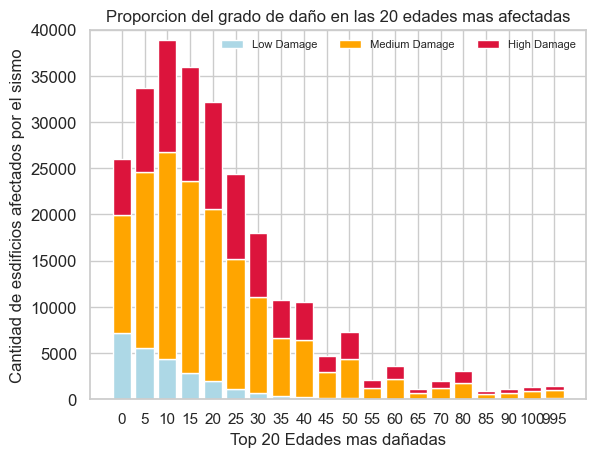

In [16]:
my_colors = ['lightblue','orange','crimson']
labels = ["0", "5", "10","15", "20", "25", "30", "35", "40", "45","50", "55", "60", "65", "70", "80", "85", "90", "100", "995"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [edad_low,edad_medium,edad_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,40000])
plt.title("Proporcion del grado de daño en las 20 edades mas afectadas",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de esdificios afectados por el sismo", fontsize=12)
plt.xlabel('Top 20 Edades mas dañadas', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.savefig("top 20 edades.jpg")
plt.show()

## Por ubicacion geografica

In [17]:
data_values_short["geo_level_1_id"].value_counts()

6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: geo_level_1_id, dtype: int64

In [18]:
# Analizo las 10 regiones con mayor cantidad de edificios dañados
top10MasDañadas = dict(data_values_short["geo_level_1_id"].value_counts().nlargest(10))
id_mas_dañadas = sorted(list(top10MasDañadas.keys()))
id_mas_dañadas

[4, 6, 7, 8, 10, 17, 20, 21, 26, 27]

In [19]:
list(top10MasDañadas.keys())

[6, 26, 10, 17, 8, 7, 20, 21, 4, 27]

In [20]:
daño_por_lugar = data_values_short\
.groupby(["geo_level_1_id","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_lugar.reset_index(inplace = True)
daño_por_lugar
    

,geo_level_1_id,damage_grade,cantidad
0,0,1,337
1,0,2,3075
2,0,3,599
3,1,1,411
4,1,2,1985
...,...,...,...
88,29,2,349
89,29,3,39
90,30,1,252
91,30,2,2127


In [21]:
id_low = []
id_medium = []
id_high = []
for i in range(0,len(daño_por_lugar)-1):
    if daño_por_lugar.loc[i,"geo_level_1_id"] in id_mas_dañadas:

        if (daño_por_lugar.loc[i,"damage_grade"] == "1"):
            id_low.append(daño_por_lugar.loc[i,"cantidad"])
        elif (daño_por_lugar.loc[i,"damage_grade"] == "2"):
            id_medium.append(daño_por_lugar.loc[i,"cantidad"])
        elif (daño_por_lugar.loc[i,"damage_grade"] == "3"):
            id_high.append(daño_por_lugar.loc[i,"cantidad"])

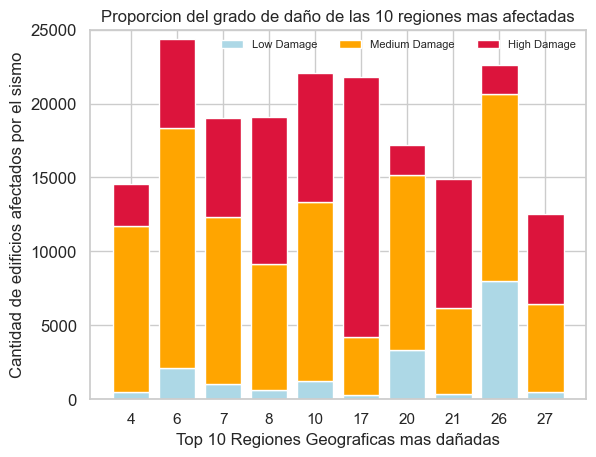

In [22]:
my_colors = ['lightblue','orange','crimson']
labels = ["4","6", "7", "8", "10", "17", "20", "21", "26", "27"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [id_low,id_medium,id_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,25000])
plt.title("Proporcion del grado de daño de las 10 regiones mas afectadas",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de edificios afectados por el sismo", fontsize=12)
plt.xlabel('Top 10 Regiones Geograficas mas dañadas', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.savefig("top 10 regiones mas dañadas.jpg", bbox_inches='tight')
plt.show()


## Por cantidad de pisos

In [23]:
data_values_short["count_floors_pre_eq"].describe()

count             260,601.00
mean                    2.13
std                     0.73
min                     1.00
25%                     2.00
50%                     2.00
75%                     2.00
max                     9.00
Name: count_floors_pre_eq, dtype: float64

In [24]:
#Analizo porcentaje de daños por cantidad de pisos
daño_por_pisos = data_values_short.groupby(["count_floors_pre_eq","damage_grade"]).agg({"cantidad" : "count"})
daño_por_pisos.reset_index(inplace = True)


In [25]:
data_values_short["count_floors_pre_eq"].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

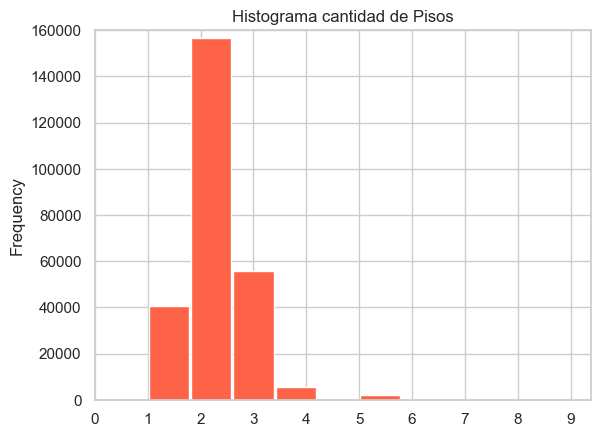

In [26]:
data_values_short["count_floors_pre_eq"].plot(kind = "hist",bins = 10,color='tomato',\
      rwidth=0.95,ylim=(0,160000),xticks=range(0,10),\
      title="Histograma cantidad de Pisos", ylabel = "Frecuencia", xlabel = "Cantidad de pisos")
plt.savefig("histograma cant pisos.jpg")

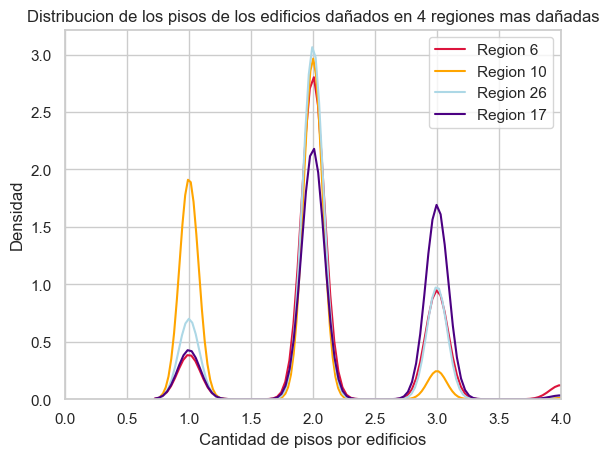

In [27]:
#Me quedo con las 5 regiones mas afectadas y veo distribucion de cantidad de pisos
g = sns.distplot(data_values_short[data_values_short["geo_level_1_id"] == 6]["count_floors_pre_eq"],color="crimson",hist = False,label= "Region 6")
g = sns.distplot(data_values_short[data_values_short["geo_level_1_id"] == 26]["count_floors_pre_eq"],color="orange",hist = False,label= "Region 10")
g = sns.distplot(data_values_short[data_values_short["geo_level_1_id"] == 10]["count_floors_pre_eq"],color="lightblue",hist = False,label= "Region 26")
g = sns.distplot(data_values_short[data_values_short["geo_level_1_id"] == 17]["count_floors_pre_eq"],color="indigo",hist = False,label= "Region 17")
g.set(xlim=(0,4))
plt.legend()
g.set_ylabel("Densidad")
g.set_xlabel("Cantidad de pisos por edificios")
g.set_title("Distribucion de los pisos de los edificios dañados en 4 regiones mas dañadas")
plt.savefig("pisos en 4 regiones.jpg")

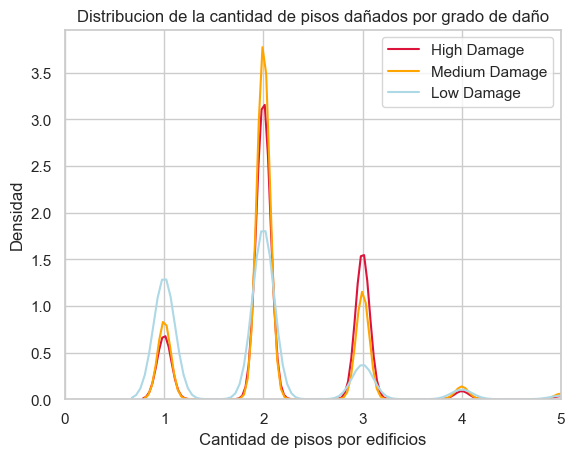

In [28]:
#Me quedo con las 5 regiones mas afectadas y veo distribucion de cantidad de pisos
g = sns.distplot(data_values_short[data_values_short["damage_grade"] == "3"]["count_floors_pre_eq"],color="crimson",hist = False,label= "High Damage")
g = sns.distplot(data_values_short[data_values_short["damage_grade"] == "2"]["count_floors_pre_eq"],color="orange",hist = False,label= "Medium Damage")
g = sns.distplot(data_values_short[data_values_short["damage_grade"] == "1"]["count_floors_pre_eq"],color="lightblue",hist = False,label= "Low Damage")
g.set(xlim=(0,5))
plt.legend()
g.set_ylabel("Densidad")
g.set_xlabel("Cantidad de pisos por edificios")
g.set_title("Distribucion de la cantidad de pisos dañados por grado de daño")
plt.savefig("distribucion de pisos por grado de daño.jpg")
plt.show()

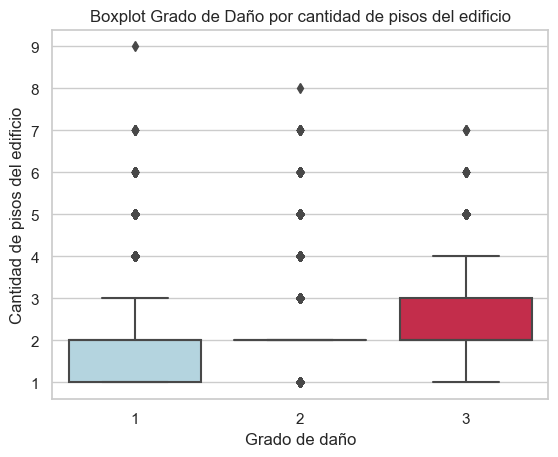

In [29]:
g = sns.boxplot\
(y="count_floors_pre_eq",x="damage_grade",data = data_values_short\
 ,palette = {"3":"crimson","2":"orange","1":"lightblue"})
g.set_title("Boxplot Grado de Daño por cantidad de pisos del edificio")
g.set_ylabel("Cantidad de pisos del edificio")
g.set_xlabel("Grado de daño")
plt.savefig("boxplot pisos.jpg")

## Por altura del edificio

In [30]:
data_values_short["height_percentage"].describe()

count             260,601.00
mean                    5.43
std                     1.92
min                     2.00
25%                     4.00
50%                     5.00
75%                     6.00
max                    32.00
Name: height_percentage, dtype: float64

In [31]:
#Analizo porcentaje de daño por altura
daño_por_altura = data_values_short.groupby(["height_percentage","damage_grade"]).agg({"cantidad" : "count"})
daño_por_altura

cantidad
height_percentage damage_grade          
2                 1                 1502
                  2                 4841
                  3                 2962
3                 1                 6122
                  2                13636
...                                  ...
31                2                    1
                  3                    0
32                1                    0
                  2                    1
                  3                   74

[81 rows x 1 columns]

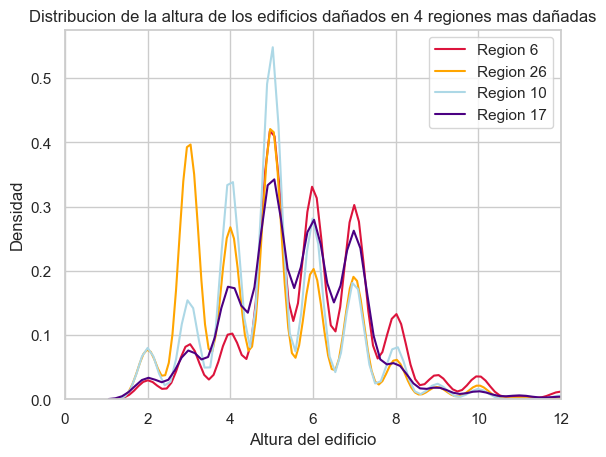

In [32]:
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 6]["height_percentage"],color="crimson",label= "Region 6",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 26]["height_percentage"],color="orange",label = "Region 26",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 10]["height_percentage"],color="lightblue",label="Region 10",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 17]["height_percentage"],color="indigo",label="Region 17",shade = False)
g.set(xlim=(0,12))
plt.legend()
g.set_ylabel("Densidad")
g.set_xlabel("Altura del edificio")
g.set_title("Distribucion de la altura de los edificios dañados en 4 regiones mas dañadas")
plt.savefig("altura 4 reg.jpg")

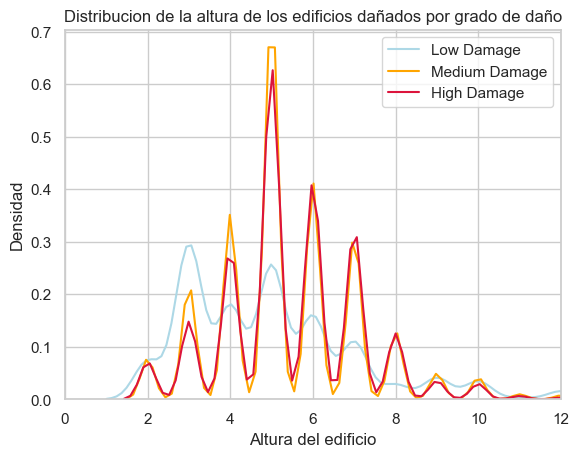

In [33]:
g = sns.kdeplot(data_values_short[data_values_short["damage_grade"] == "1"]["height_percentage"],color="lightblue",label= "Low Damage",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["damage_grade"] == "2"]["height_percentage"],color="orange",label = "Medium Damage",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["damage_grade"] == "3"]["height_percentage"],color="crimson",label="High Damage",shade = False)
g.set(xlim=(0,12))
plt.legend()
g.set_ylabel("Densidad")
g.set_xlabel("Altura del edificio")
g.set_title("Distribucion de la altura de los edificios dañados por grado de daño")
plt.savefig("altura por grado.jpg")

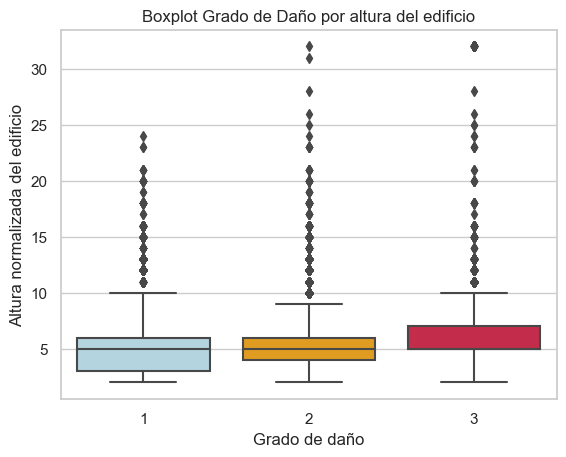

In [34]:
g = sns.boxplot\
(y="height_percentage",x="damage_grade",data = data_values_short\
 ,palette = {"3":"crimson","2":"orange","1":"lightblue"})
g.set_title("Boxplot Grado de Daño por altura del edificio")
g.set_ylabel("Altura normalizada del edificio")
g.set_xlabel("Grado de daño")
plt.savefig("histograma cant pisos.jpg")

## Por area del edificio 

In [35]:
data_values_short["area_percentage"].describe()

count             260,601.00
mean                    8.02
std                     4.39
min                     1.00
25%                     5.00
50%                     7.00
75%                     9.00
max                   100.00
Name: area_percentage, dtype: float64

In [36]:
#Analizo porcentaje de daño por area
daño_por_area = data_values_short.groupby(["area_percentage","damage_grade"]).agg({"cantidad" : "count"})
daño_por_area

cantidad
area_percentage damage_grade          
1               1                   12
                2                   49
                3                   29
2               1                  408
                2                 1683
...                                ...
96              2                    1
                3                    1
100             1                    0
                2                    1
                3                    0

[252 rows x 1 columns]

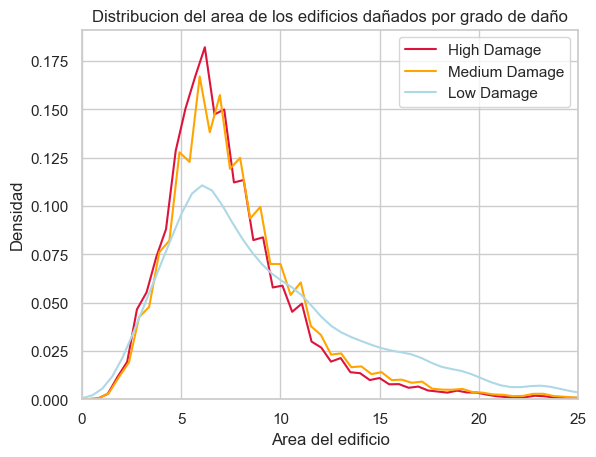

In [37]:
g = sns.kdeplot(data_values_short[data_values_short["damage_grade"] == "3"]["area_percentage"],color="crimson",label= "High Damage")
g = sns.kdeplot(data_values_short[data_values_short["damage_grade"] == "2"]["area_percentage"],color="orange",label = "Medium Damage")
g = sns.kdeplot(data_values_short[data_values_short["damage_grade"] == "1"]["area_percentage"],color="lightblue",label="Low Damage")

g.set(xlim=(0,25))
plt.legend()
g.set_ylabel("Densidad")
g.set_xlabel("Area del edificio")
g.set_title("Distribucion del area de los edificios dañados por grado de daño")
plt.savefig("area x daño.jpg")

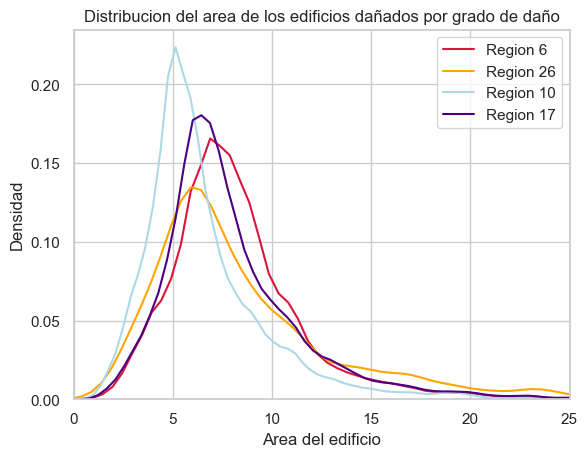

In [38]:
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 6]["area_percentage"],color="crimson",label= "Region 6",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 26]["area_percentage"],color="orange",label = "Region 26",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 10]["area_percentage"],color="lightblue",label="Region 10",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 17]["area_percentage"],color="indigo",label="Region 17",shade = False)
g.set(xlim=(0,25))
plt.legend()
g.set_ylabel("Densidad")
g.set_xlabel("Area del edificio")
g.set_title("Distribucion del area de los edificios dañados por grado de daño")
plt.savefig("area 4 reg.jpg")

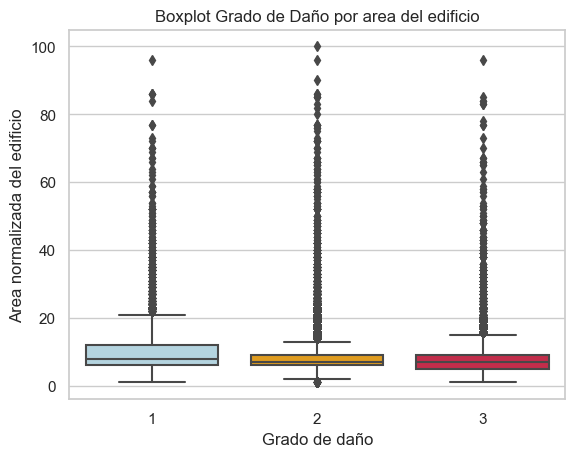

In [39]:
g = sns.boxplot\
(y="area_percentage",x="damage_grade",data = data_values_short\
 ,palette = {"3":"crimson","2":"orange","1":"lightblue"})
g.set_title("Boxplot Grado de Daño por area del edificio")
g.set_ylabel("Area normalizada del edificio")
g.set_xlabel("Grado de daño")
plt.savefig("boxplot area.jpg")

## Analizo mas columnas 

In [40]:
# Me quedo solo con los datos que me toca analizar
data_values_categorical = data.loc[:,["building_id",
                                       "legal_ownership_status",
                                       "land_surface_condition",
                                       "roof_type",
                                       "foundation_type",
                                       "ground_floor_type",
                                       "other_floor_type",
                                       "position",
                                       "plan_configuration",
                                       "damage_grade"
                                      ]]


# Unifico data frames
data_values_categorical["cantidad"] = 1 

In [41]:
data_values_categorical.describe(include="all")

,building_id,legal_ownership_status,land_surface_condition,roof_type,foundation_type,ground_floor_type,other_floor_type,position,plan_configuration,damage_grade,cantidad
count,"260,601.00",260601,260601,260601,260601,260601,260601,260601,260601,260601,"260,601.00"
unique,nan,4,3,3,5,5,4,4,10,3,nan
top,nan,v,t,n,r,f,q,s,d,2,nan
freq,nan,250939,216757,182842,219196,209619,165282,202090,250072,148259,nan
mean,"525,675.48",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
std,"304,545.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
min,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
25%,"261,190.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
50%,"525,757.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
75%,"789,762.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


# Analizo por estado legal de la tierra

In [42]:
daño_por_estado = data_values_categorical\
.groupby(["legal_ownership_status","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_estado.reset_index(inplace = True)
daño_por_estado
    

,legal_ownership_status,damage_grade,cantidad
0,a,1,1511
1,a,2,3074
2,a,3,927
3,r,1,213
4,r,2,727
5,r,3,533
6,v,1,23270
7,v,2,143154
8,v,3,84515
9,w,1,130


In [43]:
estado_low = list(daño_por_estado.loc[daño_por_estado["damage_grade"]=="1","cantidad"])
estado_low

[1511, 213, 23270, 130]

In [44]:
estado_medium = list(daño_por_estado.loc[daño_por_estado["damage_grade"]=="2","cantidad"])
estado_medium

[3074, 727, 143154, 1304]

In [45]:
estado_high = list(daño_por_estado.loc[daño_por_estado["damage_grade"]=="3","cantidad"])
estado_high

[927, 533, 84515, 1243]

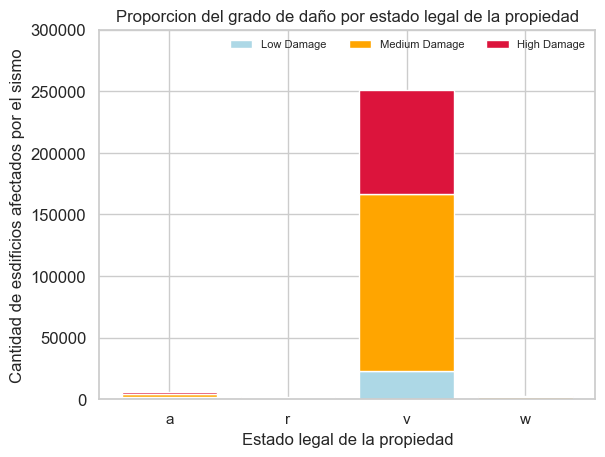

In [46]:
my_colors = ['lightblue','orange','crimson']
labels = ["a","r", "v", "w"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [estado_low,estado_medium,estado_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,300000])
plt.title("Proporcion del grado de daño por estado legal de la propiedad",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de esdificios afectados por el sismo", fontsize=12)
plt.xlabel('Estado legal de la propiedad', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()


# Analizo tipo de cimientos

In [47]:
daño_por_superficie= data_values_categorical\
.groupby(["foundation_type","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_superficie.reset_index(inplace = True)
daño_por_superficie


,foundation_type,damage_grade,cantidad
0,h,1,358
1,h,2,579
2,h,3,511
3,i,1,6004
4,i,2,4354
5,i,3,221
6,r,1,10720
7,r,2,125515
8,r,3,82961
9,u,1,3689


In [48]:
superficie_low = list(daño_por_superficie.loc[daño_por_superficie["damage_grade"]=="1","cantidad"])
superficie_medium = list(daño_por_superficie.loc[daño_por_superficie["damage_grade"]=="2","cantidad"])
superficie_high = list(daño_por_superficie.loc[daño_por_superficie["damage_grade"]=="3","cantidad"])

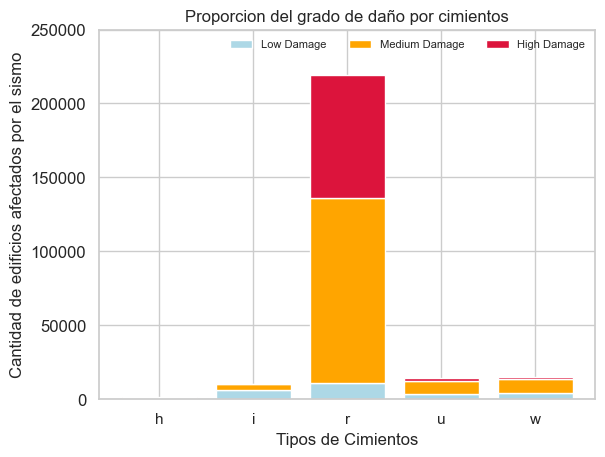

In [49]:
my_colors = ['lightblue','orange','crimson']
labels = ["h","i", "r","u", "w"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [superficie_low,superficie_medium,superficie_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,250000])
plt.title("Proporcion del grado de daño por cimientos",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de edificios afectados por el sismo", fontsize=12)
plt.xlabel('Tipos de Cimientos', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()

# Analizo por tipo de techos

In [50]:
daño_por_techos= data_values_categorical\
.groupby(["roof_type","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_techos.reset_index(inplace = True)
daño_por_techos

,roof_type,damage_grade,cantidad
0,n,1,13547
1,n,2,106447
2,n,3,62848
3,q,1,3926
4,q,2,34009
5,q,3,23641
6,x,1,7651
7,x,2,7803
8,x,3,729


In [51]:
techos_low = list(daño_por_techos.loc[daño_por_techos["damage_grade"]=="1","cantidad"])
techos_medium = list(daño_por_techos.loc[daño_por_techos["damage_grade"]=="2","cantidad"])
techos_high = list(daño_por_techos.loc[daño_por_techos["damage_grade"]=="3","cantidad"])

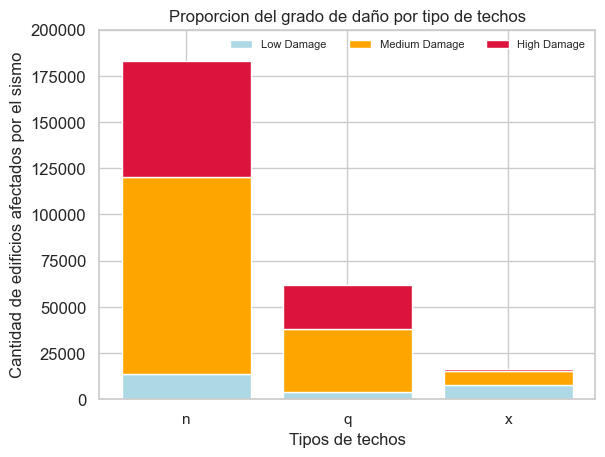

In [52]:
my_colors = ['lightblue','orange','crimson']
labels = ["n","q", "x"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [techos_low,techos_medium,techos_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,200000])
plt.title("Proporcion del grado de daño por tipo de techos",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de edificios afectados por el sismo", fontsize=12)
plt.xlabel('Tipos de techos', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()

# Analizo por tipo de tipo de construcción usado en la planta baja

In [53]:
daño_por_piso= data_values_categorical\
.groupby(["ground_floor_type","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_piso.reset_index(inplace = True)
daño_por_piso

,ground_floor_type,damage_grade,cantidad
0,f,1,12474
1,f,2,119877
2,f,3,77268
3,m,1,90
4,m,2,343
5,m,3,75
6,v,1,10309
7,v,2,12971
8,v,3,1313
9,x,1,2052


In [54]:
piso_low = list(daño_por_piso.loc[daño_por_piso["damage_grade"]=="1","cantidad"])
piso_medium = list(daño_por_piso.loc[daño_por_piso["damage_grade"]=="2","cantidad"])
piso_high = list(daño_por_piso.loc[daño_por_piso["damage_grade"]=="3","cantidad"])

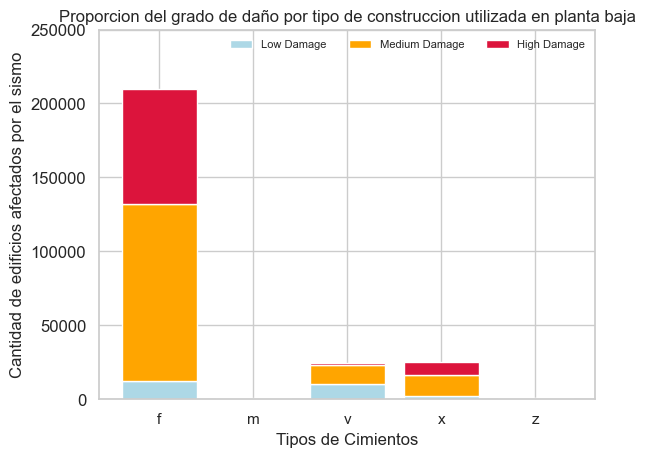

In [55]:
my_colors = ['lightblue','orange','crimson']
labels = ["f","m", "v","x", "z"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [piso_low,piso_medium,piso_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,250000])
plt.title("Proporcion del grado de daño por tipo de construccion utilizada en planta baja",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de edificios afectados por el sismo", fontsize=12)
plt.xlabel('Tipos de Cimientos', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()

# Analizo por tipo de construccion usada en otros pisos
                                    

In [56]:
daño_por_otros_pisos= data_values_categorical\
.groupby(["other_floor_type","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_otros_pisos.reset_index(inplace = True)
daño_por_otros_pisos

,other_floor_type,damage_grade,cantidad
0,j,1,8886
1,j,2,20362
2,j,3,10595
3,q,1,7387
4,q,2,98320
5,q,3,59575
6,s,1,5423
7,s,2,5904
8,s,3,701
9,x,1,3428


In [57]:
otros_pisos_low = list(daño_por_otros_pisos.loc[daño_por_otros_pisos["damage_grade"]=="1","cantidad"])
otros_pisos_medium = list(daño_por_otros_pisos.loc[daño_por_otros_pisos["damage_grade"]=="2","cantidad"])
otros_pisos_high = list(daño_por_otros_pisos.loc[daño_por_otros_pisos["damage_grade"]=="3","cantidad"])

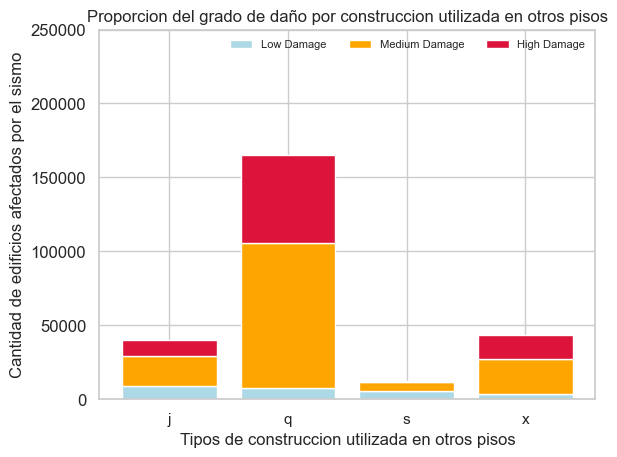

In [58]:
my_colors = ['lightblue','orange','crimson']
labels = ["j","q", "s","x"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [otros_pisos_low,otros_pisos_medium,otros_pisos_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,250000])
plt.title("Proporcion del grado de daño por construccion utilizada en otros pisos",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de edificios afectados por el sismo", fontsize=12)
plt.xlabel('Tipos de construccion utilizada en otros pisos', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()

# Analizo por  posicion
                                       

In [59]:
daño_por_posicion= data_values_categorical\
.groupby(["position","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_posicion.reset_index(inplace = True)
daño_por_posicion

,position,damage_grade,cantidad
0,j,1,1675
1,j,2,7899
2,j,3,3708
3,o,1,120
4,o,2,1609
5,o,3,604
6,s,1,19867
7,s,2,116051
8,s,3,66172
9,t,1,3462


In [60]:
posicion_low = list(daño_por_posicion.loc[daño_por_posicion["damage_grade"]=="1","cantidad"])
posicion_medium = list(daño_por_posicion.loc[daño_por_posicion["damage_grade"]=="2","cantidad"])
posicion_high = list(daño_por_posicion.loc[daño_por_posicion["damage_grade"]=="3","cantidad"])

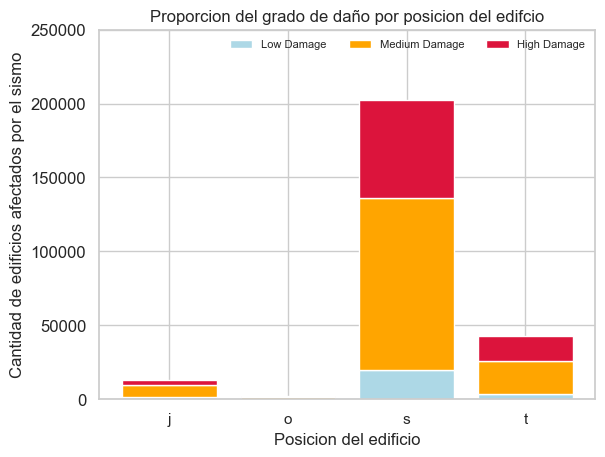

In [61]:
my_colors = ['lightblue','orange','crimson']
labels = ["j","o", "s","t"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [posicion_low,posicion_medium,posicion_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,250000])
plt.title("Proporcion del grado de daño por posicion del edifcio",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de edificios afectados por el sismo", fontsize=12)
plt.xlabel('Posicion del edificio', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()

# Analizo por formato de construcción de la edificación (para diseño sísmico)

In [62]:
daño_por_diseño_sismico= data_values_categorical\
.groupby(["plan_configuration","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_diseño_sismico.reset_index(inplace = True)
daño_por_diseño_sismico

,plan_configuration,damage_grade,cantidad
0,a,1,66
1,a,2,157
2,a,3,29
3,c,1,86
4,c,2,206
5,c,3,33
6,d,1,23310
7,d,2,142523
8,d,3,84239
9,f,1,0


In [63]:
diseño_sismico_low = list(daño_por_diseño_sismico.loc[daño_por_diseño_sismico["damage_grade"]=="1","cantidad"])
diseño_sismico_medium = list(daño_por_diseño_sismico.loc[daño_por_diseño_sismico["damage_grade"]=="2","cantidad"])
diseño_sismico_high = list(daño_por_diseño_sismico.loc[daño_por_diseño_sismico["damage_grade"]=="3","cantidad"])

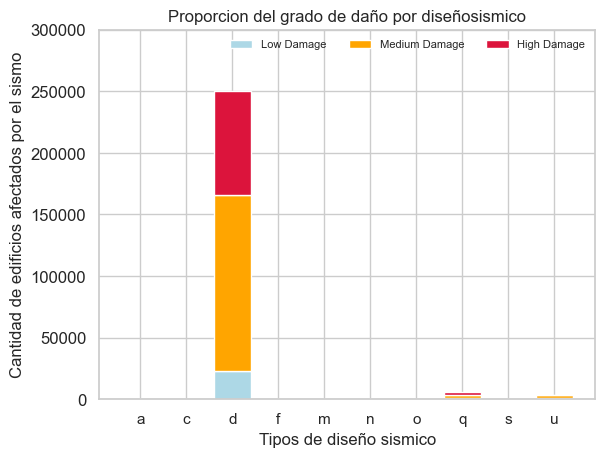

In [64]:
my_colors = ['lightblue','orange','crimson']
labels = ["a","c", "d","f", "m", "n","o","q","s","u"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [diseño_sismico_low,diseño_sismico_medium,diseño_sismico_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,300000])
plt.title("Proporcion del grado de daño por diseñosismico",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de edificios afectados por el sismo", fontsize=12)
plt.xlabel('Tipos de diseño sismico', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()